# Allan Pereira Fenelon

## Bilbiotecas

In [1]:
import statsmodels.api as sm
from pmdarima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import warnings
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import timeseriesmetrics as tss
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from pmdarima import model_selection
import time
import auxiliar as ax
from sklearn.tree import DecisionTreeRegressor
from skopt.space import Real, Integer
from skopt import gp_minimize
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import krlst_implement as KRLS

import timeseriesmetrics as mt

warnings.filterwarnings('ignore')

# DEFININDO O NOSSO PATH COM OS DADOS
DATA_PATH = '../bds/'
tickers = ['TSLA', 'NIO', 'LI', 'RIVN', 'BYDDY']

times_series = {}
for name in tickers:
    serie = pd.read_csv(DATA_PATH + name + '.csv' ,sep=',',usecols=[0,4])
    times_series[name] = serie

## Séries temporais utilizadas

As séries temporais a seguir são relativas às séries temporais sobre o preço de fechamento das ações financeiras, mais específico em séries temporais financeiras de carros elétricos. Há 5 empresas nesse trabalho, onde se destacam duas mais populares no mundo hoje em dia que é a ação da empresa Tesla Inc. e da empresa BYD.

__IMPORTANTE:__ 
Os registros de cada série temporal são diárias, e o valor em dólar. Temos observações de 5 anos corridos, do período de __01/10/2020 a 01/10/2024__. Passando pelo período da pandemia até os dias atuais.

$\textbf{1. Tesla, Inc. (TSLA)} \\$
A Tesla é uma das líderes globais na produção de veículos elétricos e soluções de armazenamento de energia. Fundada por Elon Musk, a empresa é conhecida por seus carros elétricos de alto desempenho, como o Model S, Model 3, Model X e Model Y. Além de veículos elétricos, a Tesla também produz baterias e sistemas de energia solar.

$\textbf{2. BYD Company Limited (BYDDY)} \\$
A BYD é uma das maiores fabricantes de veículos elétricos e baterias do mundo. Com sede na China, a empresa produz uma ampla gama de veículos elétricos, incluindo ônibus e carros de passageiros, além de baterias e tecnologias de energia renovável. A BYD tem um forte foco em soluções sustentáveis e é uma das líderes no mercado de veículos elétricos na China. 

$\textbf{3. Li Auto Inc. (LI)} \\$
Li Auto é uma fabricante chinesa de veículos elétricos e híbridos plug-in. A empresa é conhecida por seus SUVs híbridos, como o Li ONE. Li Auto se concentra em fornecer veículos elétricos com tecnologias avançadas e uma extensa rede de recarga e suporte. 

$\textbf{4. NIO Inc. (NIO)} \\$
A NIO é uma fabricante de veículos elétricos premium com sede na China. A empresa é conhecida por seus SUVs elétricos e sedans, como o ES8, ES6 e o EC6. A NIO também se destaca por seu modelo de substituição de bateria, oferecendo um serviço onde os clientes podem trocar as baterias de seus veículos em estações de troca rápida. 

$\textbf{5. Rivian Automotive Inc. (RIVN)} \\$
A Rivian é uma fabricante americana de veículos elétricos focada em modelos voltados para aventuras e transporte sustentável. Fundada em 2009 e com sede na Califórnia, a empresa desenvolve caminhonetes e SUVs, como os modelos R1T e R1S, projetados para oferecer experiências conectadas e melhorar ao longo do tempo por meio de atualizações de software. A Rivian também fabrica vans elétricas para frotas, como as usadas pela Amazon.


## Análise Descritiva

Essa seção tem como objetivo realizar uma análise descritiva detalhada das cinco séries temporais presentes em nosso estudo. A análise das estatísticas, incluindo quantis, médias, desvios padrão e outras métricas relevantes, é fundamental para compreender o comportamento de cada série ao longo do tempo. Faremos também o estudo de sazonalidade, tendência e possíveis incosistências que possam a existir nos nossos dados.


In [2]:
times_series['TSLA'].shape

(1005, 2)



- __TSLA (Tesla)__

**Média**: \$233.20

**Desvio padrão**: 56.04 (indica alta volatilidade nos preços das ações)

**Mínimo**: \$108.10 (aumento de 116% em relação à média)

**Máximo**: \$409.97 (aumento de 279% em relação ao valor mínimo)

Até 25% dos dias (~251 dias), o preço ficou abaixo de **\$193.57**, e até 75% dos dias (~754 dias), o preço ficou abaixo de **\$263.26**.

---

- __NIO (NIO Inc.)__

**Média**: \$20.90

**Desvio padrão**: 15.62 (volatilidade significativa, mas menor que a da TSLA)

**Mínimo**: \$3.67 (aumento de 470% em relação à média)

**Máximo**: \$62.84 (aumento de 62% em relação ao valor mínimo)

Até 25% dos dias (~251 dias), o preço ficou abaixo de **\$8.09**, e até 75% dos dias (~754 dias), o preço ficou abaixo de **\$35.51**.

---

- __LI (Li Auto)__

**Média**: \$28.12

**Desvio padrão**: 6.58 (baixa volatilidade em comparação com outras ações)

**Mínimo**: \$13.62 (aumento de 107% em relação à média)

**Máximo**: \$46.65 (aumento de 243% em relação ao valor mínimo)

Até 25% dos dias (~251 dias), o preço ficou abaixo de **\$22.88**, e até 75% dos dias (~754 dias), o preço ficou abaixo de **\$32.49**.

---

- __RIVN (Rivian Automotive)__

**Média**: \$28.85

**Desvio padrão**: 24.71 (alta volatilidade, refletindo o comportamento típico de ações de empresas emergentes)

**Mínimo**: \$8.40 (aumento de 1.953% em relação à média)

**Máximo**: \$172.01 (aumento de 1.953% em relação ao valor mínimo)

Até 25% dos dias (~181 dias), o preço ficou abaixo de **\$14.48**, e até 75% dos dias (~544 dias), o preço ficou abaixo de **\$32.11**.

---

- __BYDDY (BYD Company)__

**Média**: \$58.40

**Desvio padrão**: 9.55 (volatilidade moderada em comparação com outras ações)

**Mínimo**: \$31.36 (aumento de 169% em relação à média)

**Máximo**: \$84.42 (aumento de 169% em relação ao valor mínimo)

Até 25% dos dias (~251 dias), o preço ficou abaixo de **\$51.97**, e até 75% dos dias (~754 dias), o preço ficou abaixo de **\$64.03**.

---


O desvio padrão é uma medida importante da volatilidade dos preços das ações. A ação da **TSLA** apresenta o maior desvio padrão (56.04), indicando uma grande flutuação nos preços ao longo do período. Em contraste, a ação da **LI** apresenta o menor desvio padrão (6.58), sugerindo uma volatilidade mais moderada. A alta volatilidade observada em ações como **RIVN** (24.71) reflete o comportamento típico de ações de empresas emergentes, que podem passar por variações significativas de preço.

In [3]:
describle_df = pd.DataFrame({name: times_series[name]['Close'].describe() for name in tickers})
describle_df

,TSLA,NIO,LI,RIVN,BYDDY
count,1005.000000,1005.000000,1005.000000,725.000000,1005.000000
mean,233.203755,20.895095,28.116090,28.852966,58.401184
std,56.036025,15.619048,6.579817,24.714752,9.547018
min,108.099998,3.670000,13.620000,8.400000,31.360001
25%,193.570007,8.090000,22.879999,14.480000,51.970001
50%,228.813339,14.740000,28.240000,20.080000,58.520000
75%,263.260010,35.509998,32.490002,32.110001,64.029999
max,409.970001,62.840000,46.650002,172.009995,84.419998


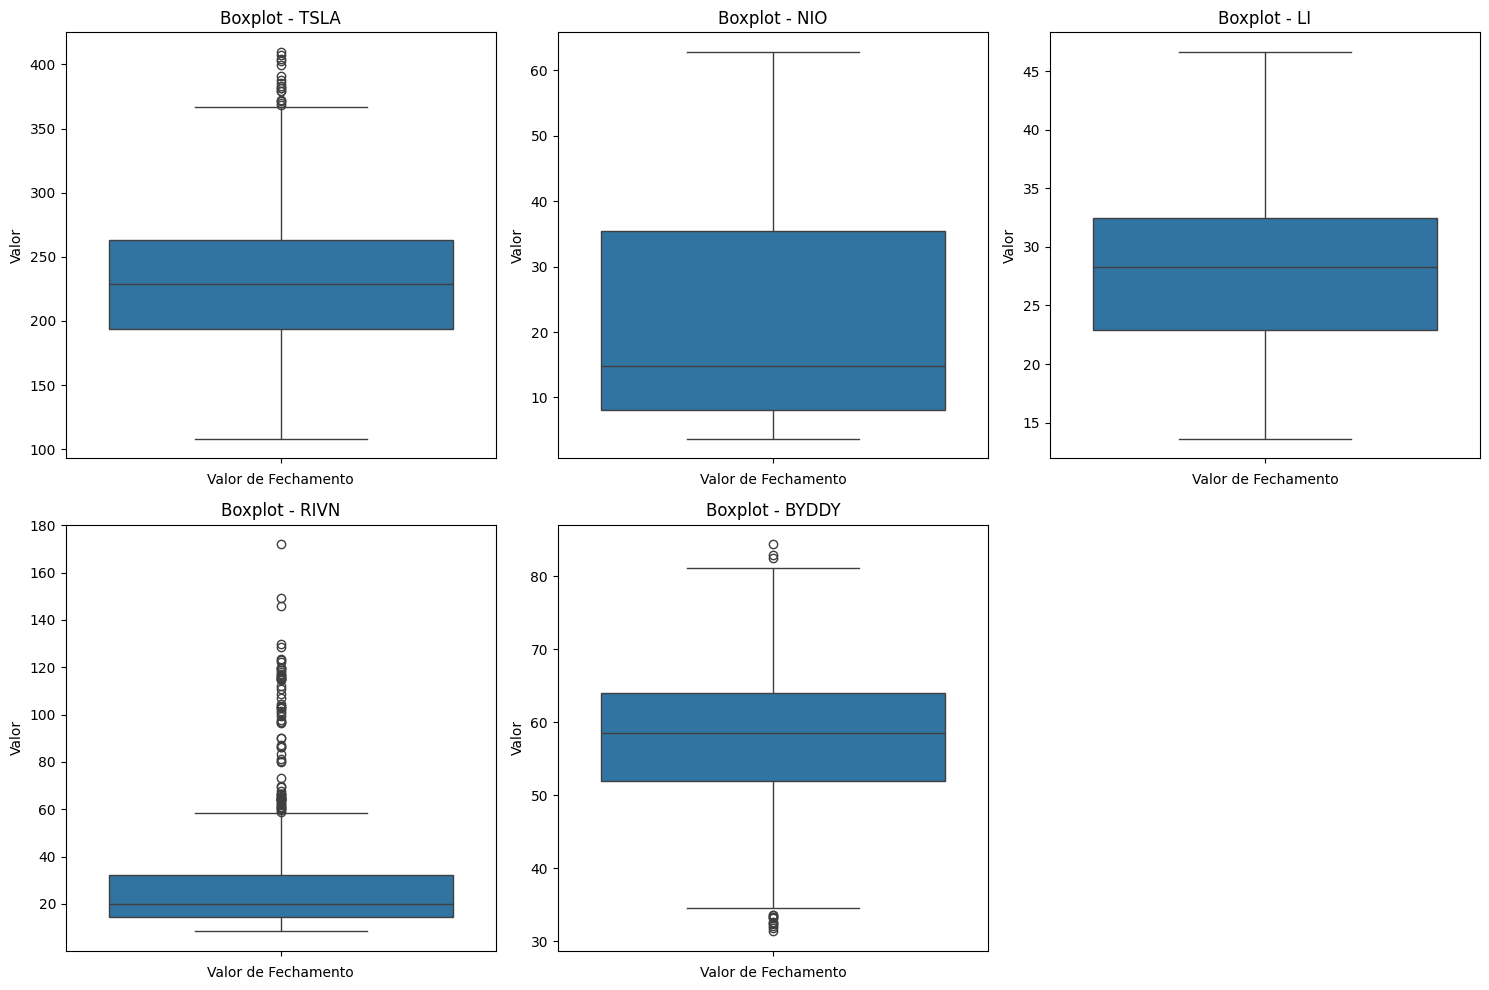

In [4]:
data = pd.DataFrame({name: times_series[name]['Close'] for name in tickers})


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, name in enumerate(tickers):
    sns.boxplot(data=times_series[name]['Close'], ax=axes[i])
    axes[i].set_title(f'Boxplot - {name}')
    axes[i].set_xlabel('Valor de Fechamento')
    axes[i].set_ylabel('Valor')

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

Observa-se que todas as cinco séries temporais analisadas não seguem uma distribuição normal, o que sugere a presença de valores extremos, tanto muito grandes quanto muito pequenos.

Na série temporal da Tesla (TSLA), em ambos os casos com e sem a transformação logarítmica a série não apresenta uma distribuição normal. A análise da distribuição revela uma assimetria à esquerda no centro dos dados, que diminui com a aplicação da transformação logarítmica. No entanto, mesmo após essa transformação, a série continua a não seguir uma distribuição normal.

A série temporal da Rivian (RIVN) apresenta características de uma distribuição exponencial, com uma grande concentração de dados na cauda esquerda. Isso sugere que eventos extremos, embora raros, são mais prováveis de ocorrer do que em uma distribuição normal.

A distribuição mais incomum é a da série NIO. Em ambos os casos, tanto na série original quanto na transformada, a distribuição se desvia significativamente das características normais. Esse comportamento atípico pode indicar fatores externos ou dinâmicas específicas que influenciam o movimento dos preços dessa ação.

Todas as séries temporais originais quanto as suas transformadas logarítimicas não seguem uma distribuição normal.

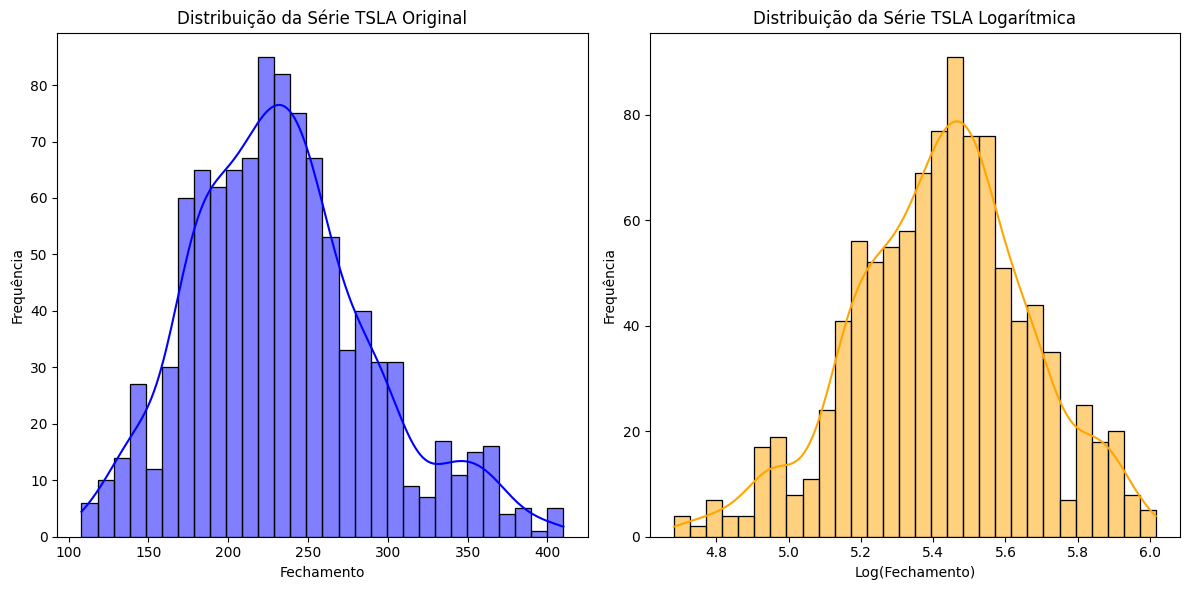

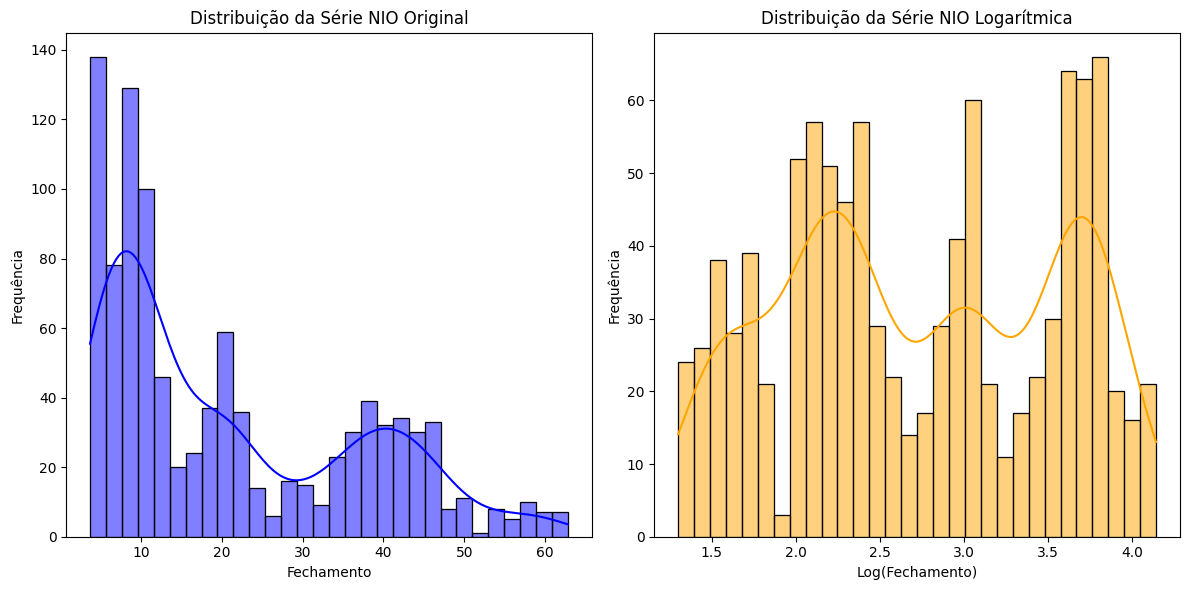

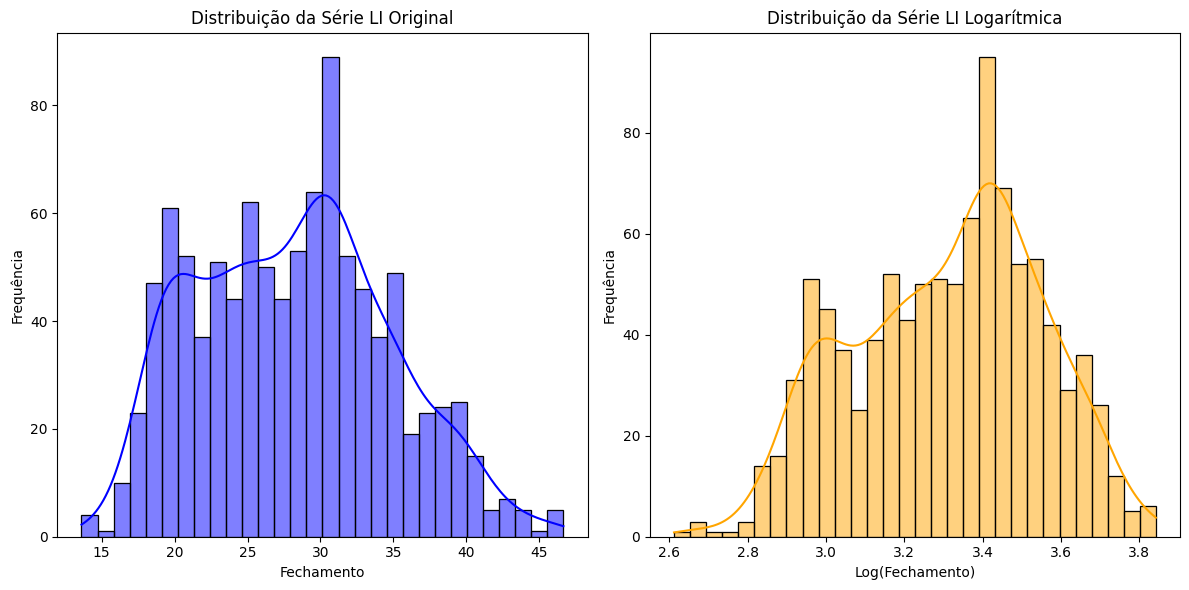

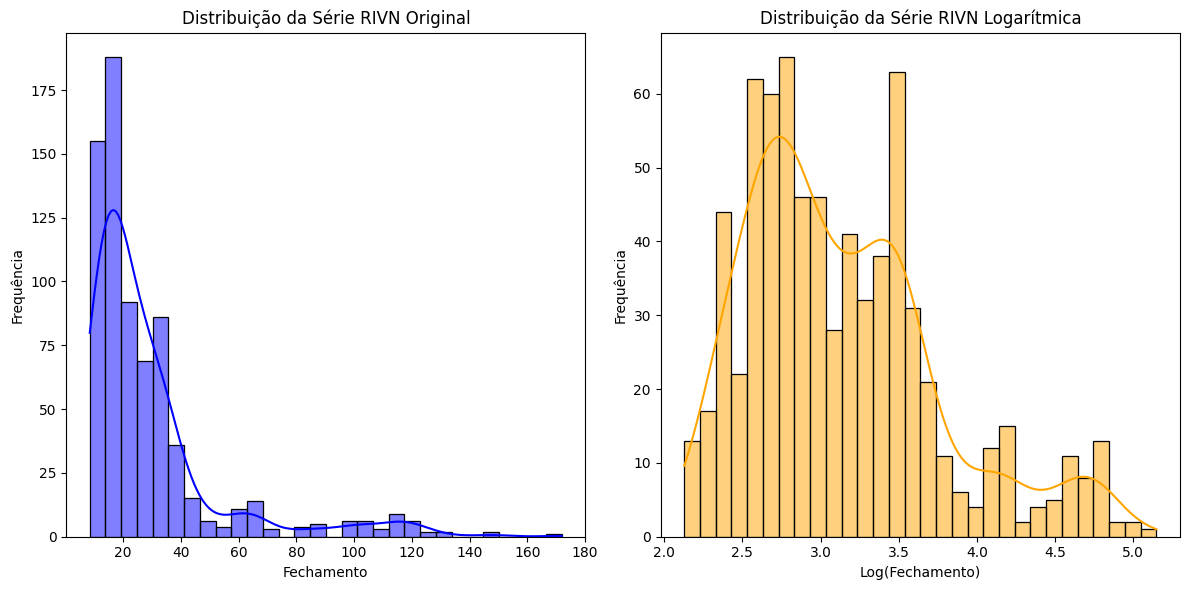

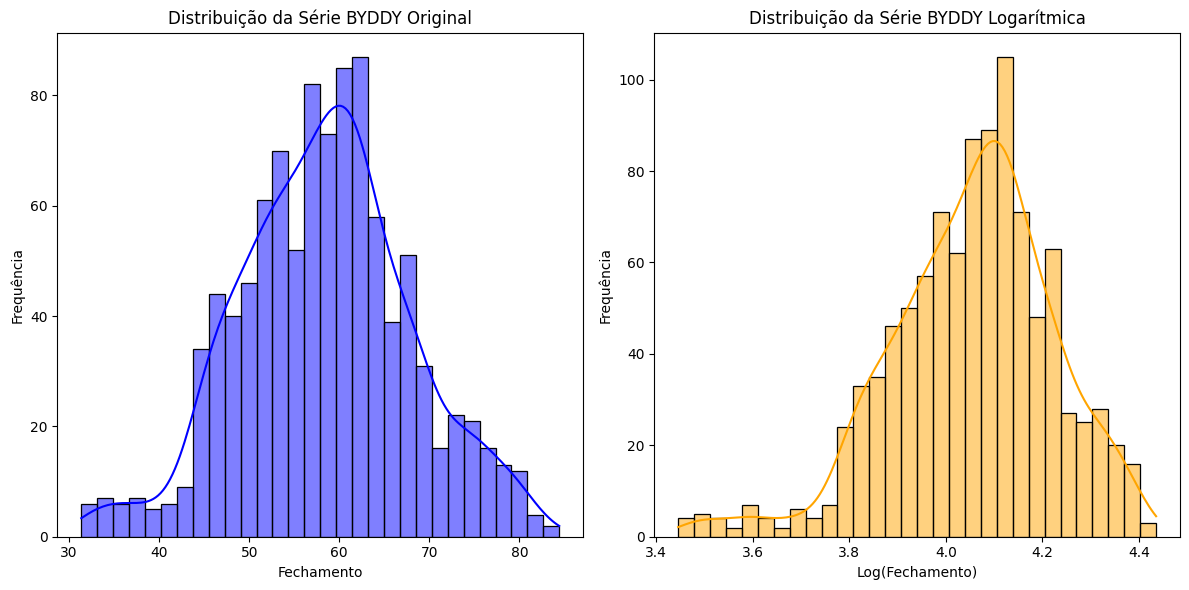

In [5]:
for name in tickers:
    plt.figure(figsize=(12, 6))
    close_values = times_series[name]['Close']
    if (close_values <= 0).any():
        print(f"A série {name} contém zeros ou valores negativos.")
    plt.subplot(1, 2, 1)
    sns.histplot(close_values, bins=30, kde=True, color='blue')
    plt.title(f'Distribuição da Série {name} Original')
    plt.xlabel('Fechamento')
    plt.ylabel('Frequência')
    close_log = np.log(close_values.replace(0, np.nan).replace(-1, np.nan))
    plt.subplot(1, 2, 2)
    sns.histplot(close_log.dropna(), bins=30, kde=True, color='orange') 
    plt.title(f'Distribuição da Série {name} Logarítmica')
    plt.xlabel('Log(Fechamento)')
    plt.ylabel('Frequência')

    plt.tight_layout()
    plt.show()

In [6]:
from scipy.stats import shapiro
resultados = []
for name in tickers:
    close_values = times_series[name]['Close']
    if (close_values <= 0).any():
        print(f"A série {name} contém zeros ou valores negativos.")
    stat, p_value = shapiro(close_values.dropna())
    normal_original = p_value > 0.05
    close_log = np.log(close_values.replace(0, np.nan).replace(-1, np.nan))
    stat_log, p_value_log = shapiro(close_log.dropna())
    normal_log = p_value_log > 0.05
    resultados.append({
        'Série': name,
        'Normalidade Original': 'Sim' if normal_original else 'Não',
        'Normalidade Logarítmica': 'Sim' if normal_log else 'Não'
    })
resultado_df = pd.DataFrame(resultados)
resultado_df

,Série,Normalidade Original,Normalidade Logarítmica
0,TSLA,Não,Não
1,NIO,Não,Não
2,LI,Não,Não
3,RIVN,Não,Não
4,BYDDY,Não,Não


Plotaremos cada uma das nossas séries temporais.

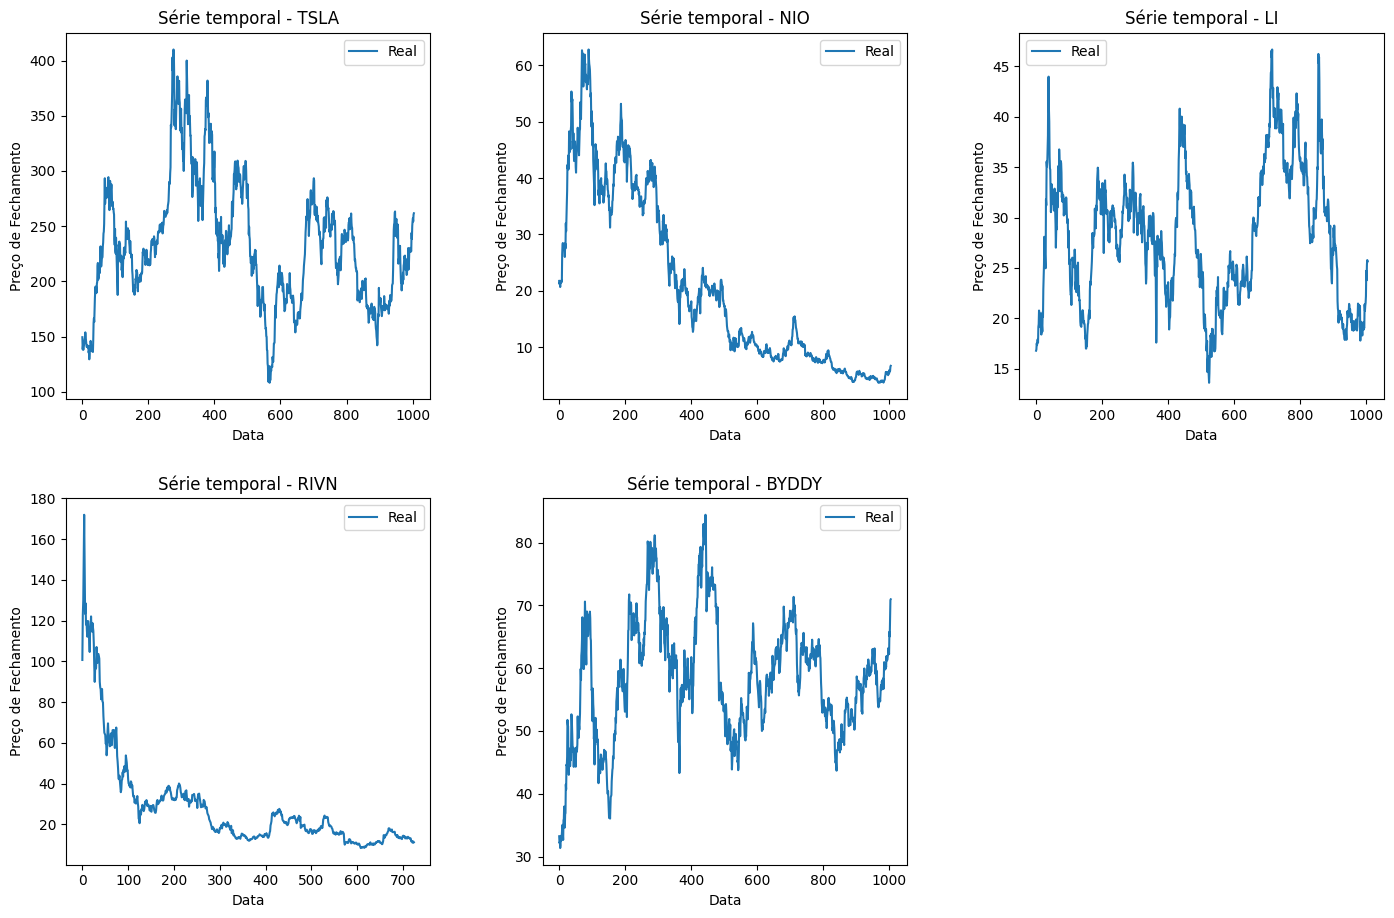

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=5) 

for idx, name in enumerate(tickers):
    row = idx // 3  
    col = idx % 3   
    
    axs[row, col].plot( times_series[name].index,  times_series[name]['Close'], label='Real')
    axs[row, col].set_title(f'Série temporal - {name}')
    axs[row, col].set_xlabel('Data')
    axs[row, col].set_ylabel('Preço de Fechamento')
    axs[row, col].legend()

axs[1, 2].axis('off')

plt.show()

## Pré-processamento

Nesta etapa, vamos se dedicar ao estudo de Lags relevantes, que estão associado ao teste de associação. Queremos fazer estudo em períodos diferentes do tempo para achar uma associação entre esse período do tempo na influencia nos demais.

Usaremos a autocorrelação parcial para fazer o estudo de Lags significativos nas nossas séries temporais. A Autocorrelação Parcial (PACF) mede a correlação entre uma variável(ou período de tempo neste caso) e suas defasagens, removendo o efeito das defasagens intermediárias.



$$
R_k = \frac{1}{N} \sum_{t=1}^{N-k} (X_t - \mu)(X_{t+k} - \mu)
$$

Onde:
\begin{align*}
R_k & : \text{ autocorrelação no lag } k \\
N & : \text{ número total de observações na série} \\
X_t & : \text{ valor da série no tempo } t \\
X_{t+k} & : \text{ valor da série no tempo } t+k \\
\mu & : \text{ média da série}
\end{align*}

Para obter os lags significantes aplicamos um teste de hipótese, onde :

$$
(H_0): \text{O lag é significante} \\

(H_a): \text{O lag não é significante}
$$

Vamos aceitar ($H_0$) quando nossa autocorrelação parcial estiver fora do nosso intervalo de confiança então vamos ter que o nosso lag no instante i é significante, caso contrário, aceitamos ($H_a$).

significantLags: [1, 5, 8, 10, 19, 25, 45, 50]
          Date       Close   (Close-1)   (Close-5)   (Close-8)  (Close-10)  \
50  2020-12-11  203.330002  209.023331  199.679993  194.919998  195.253326   
51  2020-12-14  213.276672  203.330002  213.919998  189.606674  189.199997   

    (Close-19)  (Close-25)  (Close-45)  (Close-50)  
50  136.166672  146.029999  141.973328  149.386673  
51  136.029999  143.316666  144.666672  138.363327  
significantLags: [1, 2, 3, 4, 5, 6, 8]
         Date      Close  (Close-1)  (Close-2)  (Close-3)  (Close-4)  \
8  2020-10-13  21.620001  21.850000  21.469999  21.440001  21.559999   
9  2020-10-14  26.500000  21.620001  21.850000  21.469999  21.440001   

   (Close-5)  (Close-6)  (Close-8)  
8  20.670000      21.59      21.76  
9  21.559999      20.67      21.18  
significantLags: [1, 5]
         Date  Close  (Close-1)  (Close-5)
5  2020-10-08  17.93      17.77  16.799999
6  2020-10-09  17.60      17.93  16.920000
significantLags: [1, 2, 4, 6, 10]
     

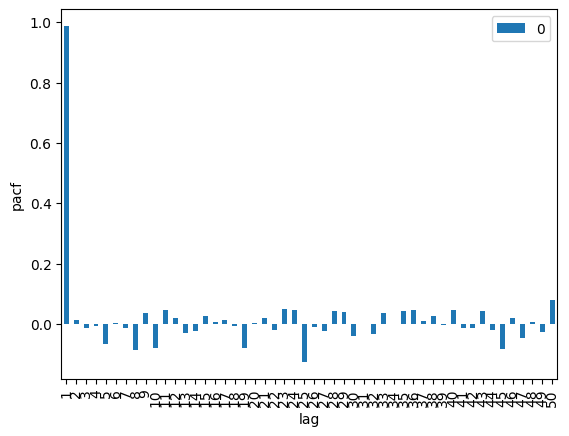

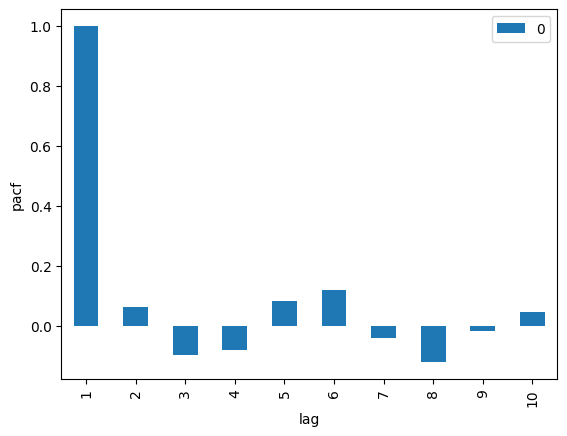

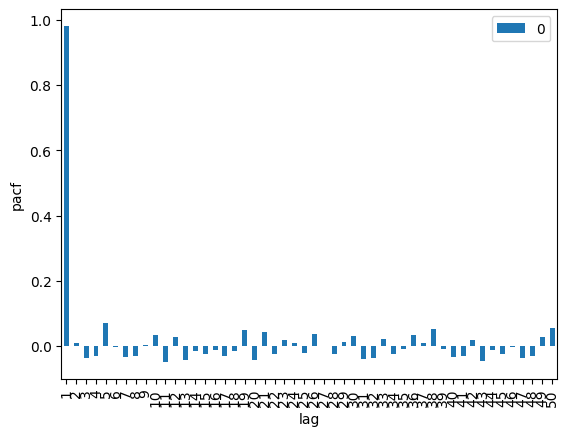

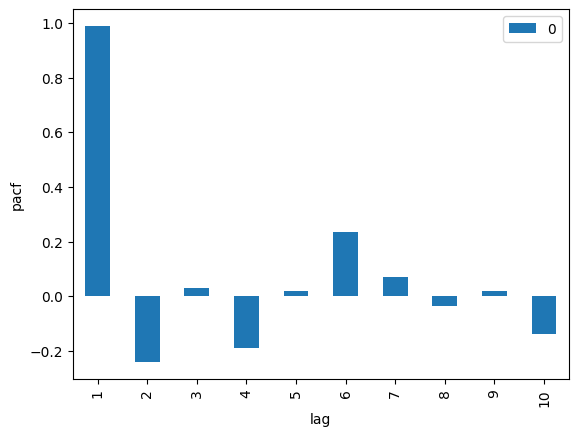

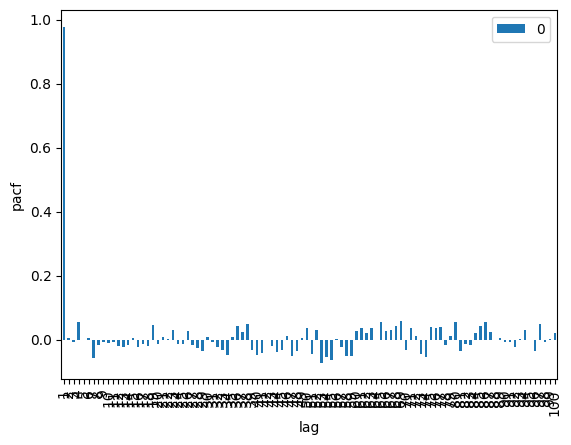

In [8]:
n_lags_significantes = {
    'TSLA': 50, 'NIO':10, 'LI': 50, 'RIVN': 10, 'BYDDY':100
}
for name in tickers:
    lags = ax.getSignificantLags(y=times_series[name]['Close'], nLags =n_lags_significantes[name], alpha=0.05)
    times_series[name] = ax.appendLagVariables(yNm='Close', significantLags = lags, df = times_series[name], dropna=True)


Aqui, fazemos a divisão em treino e teste para cada uma das nossas séries temporais.

In [9]:
X = {}
y = {}
for name in tickers:
    times_series[name] = times_series[name].dropna()
    X[name] = times_series[name].drop('Close', axis=1)
    X[name] = X[name].drop('Date', axis=1)
    y[name] = times_series[name]['Close']
    
X_train = {}
X_test = {}
y_train = {}
y_test = {}

for name in tickers:
    X_train[name], X_test[name], y_train[name], y_test[name] = train_test_split(X[name], y[name], 
                                                                                test_size=0.2, shuffle=False)

Aqui, aplicamos a nossa padronização dos dados via StandardScaler.

In [10]:
X_scale = {}
y_scale = {}
for name in tickers:
    X_scale[name] = StandardScaler()
    y_scale[name] = StandardScaler()

X_train_scale = {}
X_test_scale = {}
y_train_scale = {}
y_test_scale = {}

for name in tickers:
    X_train_scale[name] = X_scale[name].fit_transform(X_train[name])
    X_test_scale[name] = X_scale[name].fit_transform(X_test[name])

    y_train_scale[name] = y_scale[name].fit_transform(y_train[name].values.reshape(-1, 1))
    y_test_scale[name] = y_scale[name].fit_transform(y_test[name].values.reshape(-1, 1))

## Formalismo do Algoritmo

### Algoritmos

Temos os seguintes algoritmo proposto na literatura, onde o segundo é o mais completo que o que foi implementado.

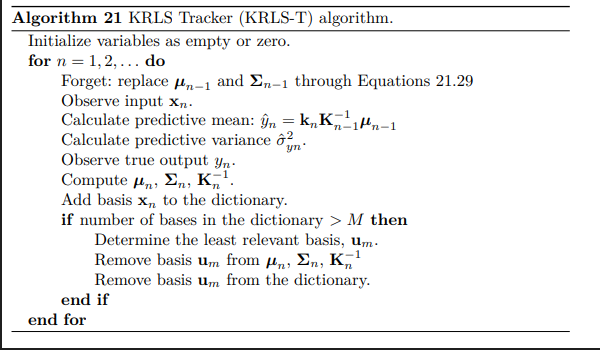

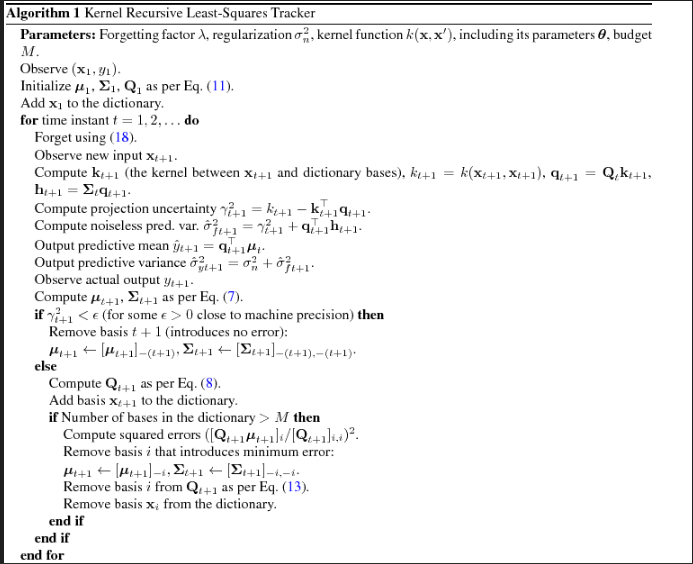



### Abordagem do algoritmo via decomposição em Valores Singulares

- __Recursive Least-Squares Tracker (KRLS-T) com Modificação via Decomposição SVD__

O **algoritmo Recursive Least-Squares Tracker (KRLS-T)** é amplamente utilizado para aprendizado online em sistemas dinâmicos e não estacionários. Baseado na metodologia de regressão de mínimos quadrados recursivos KRLS, o KRLS-T foi adaptado para operar de forma eficiente em cenários onde os dados são sequenciais e podem variar ao longo do tempo. 

A principal vantagem do KRLS-T sobre os métodos tradicionais de RLS é sua capacidade de ajustar e atualizar os parâmetros do modelo de forma recursiva, a cada nova observação, sem a necessidade de recalcular o modelo completo.

Inicialmente, assumimos entradas $\{(x_t, y_t)\}_{t=1}^{k}$, onde para cada $i=1, ..., t$, $x_i \in \mathbb{R}^D$ e $y_i \in \mathbb{R}$ é escalar. No cenário Bayesiano, precisamos de um modelo que descreva as observações e priores sobre os parâmetros de tal modelo. As observações são descritas como a soma de uma função latente não observável das entradas e algum ruído gaussiano desconhecido de média zero:

$y_i = f(x_i) + \epsilon_i$

Aqui, $p(y_i | f(x_i)) = \mathcal{N}(y_i | f(x_i), \sigma^2_n)$. Para realizar a inferência bayesiana, também assumimos que a função latente segue um processo gaussiano (PG) de média zero, com uma função de covariância $k(x, x')$ conhecida como kernel. 

A matriz de covariância $K_t$ é definida por $K_t[i,j] = k(x_i, x_j)$, sendo $K_t$ chamada de matriz do kernel. Para mais detalhes, consulte o artigo de Vaerenbergh (2015).

- __Equações Fundamentais do KRLS-T__

O algoritmo utiliza as seguintes equações:

1. $Q_t = K_t^{-1}$
2. $q_{t+1} = Q_t k_{t+1}$
3. $\gamma^2_{t+1} = k_{t+1} - k^T_{t+1} Q_t k_{t+1}$

Para implementar uma estrutura de esquecimento baseada em "Back to the Prior" (B2P), usamos:

1. $\mu \gets \sqrt{\lambda} \mu$
2. $\Sigma \gets \lambda \Sigma + (1 - \lambda) K$

- __Modificação com Decomposição SVD__

A proposta deste artigo é modificar o KRLS-T assumindo que a matriz $Q_t \approx K_t^{-1}$ seja decomposta pelo método dos valores singulares (SVD). Assim, $Q_t \approx U_t \hat{\Sigma}_t V^T_t$, onde as equações se tornam:

1. $q_{t+1} \approx U_t \hat{\Sigma}_t V^T_t k_{t+1}$
2. $\gamma^2_{t+1} \approx k_{t+1} - k^T_{t+1} U_t \hat{\Sigma}_t V^T_t k_{t+1}$

Essa modificação permite lidar com matrizes mal-condicionadas, melhorando o desempenho numérico, a eficiência computacional e a precisão das previsões.



## Processamento

Nesta seção nos dedicaremos a modelagem das nossas Séries Temporais com o Algoritmo Recursive Least-Squares Tracker e Algoritmo Recursive Least-Squares Tracker utilizando a Decomposição em Valores Singulares (SVD), e em seguida faremos a comparação do desenpenho computacional entre esses dois modelos na seção de Desempenho. A baixo, vemos o fluxograma desse projeto e que por consequência será do nosso artigo com os resultados que obtemos. A etapa atual que estamos é na etapa de __MODELAGEM__ do nosso Fluxograma.

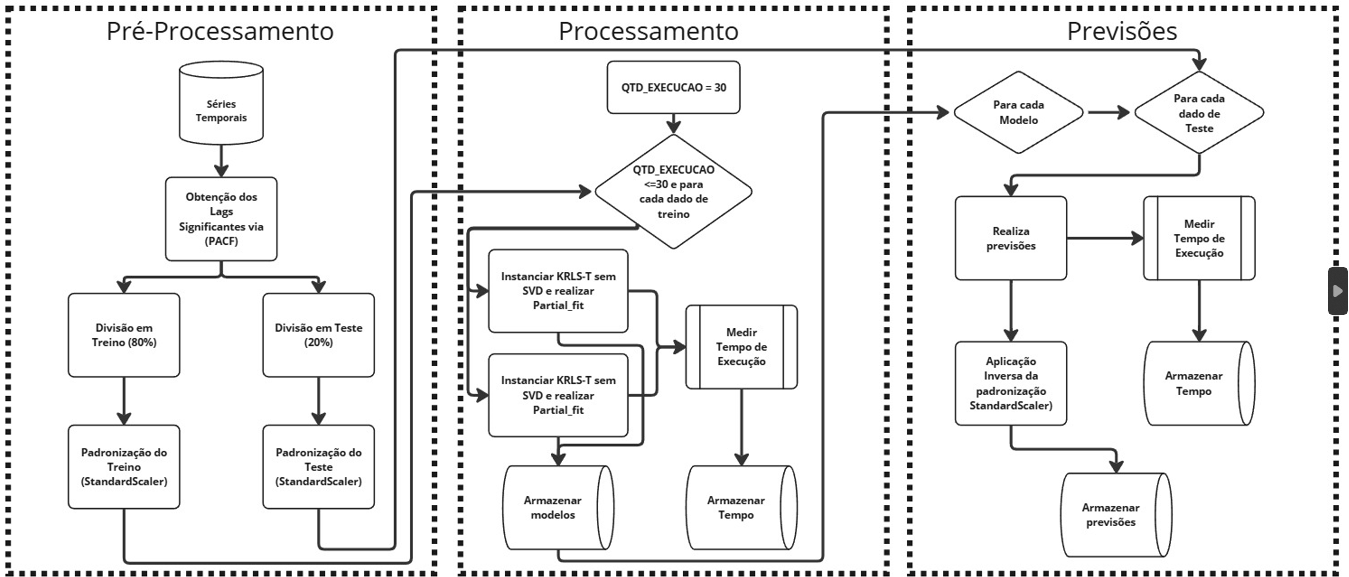

Temos 5 séries temporais para o estudo, são elas as séries temporais sob o preço de fechamento das ações da Tesla, Inc.(TSLA), BYD Company Limited (BYDDY), Li Auto Inc. (LI), NIO Inc. (NIO) e Rivian Automotive Inc. (RIVN).

Para a modelagem definimos quantidade de iterações como 30, então teremos para cada uma das 5 séries temporais 30 modelos do Algoritmo KRLS-T sem a decomposição SVD e 30 modelos do Algoritmo KRLS-T com a decomposição SVD. O que totaliza 60 modelos para cada uma das 5 séries temporais. Logo temos 300 modelos do algoritmo KRLS-T, sendo metade utilizando a decomposição SVD e a outra metade utilizando a decomposição SVD.

O processo descrito nessa seção contam com uma etapa de partial_fit onde inicialmente "treinamos" o nosso modelo. Chamamos de partial_fit pois se trada de modelo Online, e não temos o processo de treino, pois a cada predição do valor no instante t+1 é passado o valor do instante t+1 subsequentemente.

O processo contará com as previsões da série de teste do nosso modelo, pois por convenção partimos da metodologia de divisão dos dados entre treino e teste.

Com esses processos temos que dar o partial_fit com os dados de treinamentos para os cada 30 modelos que instanciamos e logo fazer a previsão com esses 30 modelos e calcular o seu desempenho computacional (tempo em segundo). 

In [11]:
QTD_ITERACAO = 30

### Hiperparâmetros utilizados no algoritmo

Os hiperparâmetros ajustados para o algoritmo KRLS-T foram: $\lambda = 0.0001$, $c = 0.00001$, $M = M[\text{name}]$, e $\sigma = 1$. O valor de $M$ varia conforme a série temporal utilizada, com os seguintes valores definidos para cada uma delas:

$$
M = \{ 
\text{'TSLA'}: 10, \text{'NIO'}: 10, \text{'LI'}: 5, \text{'RIVN'}: 10, \text{'BYDDY'}: 10
\}
$$

Cada um dos hiperparâmetros desempenha um papel fundamental no funcionamento do modelo, e todos foram padronizados na análise dos resultados para ambas as metodologias de comparação, tanto com a utilização do SVD quanto para a abordagem sem o uso do SVD:

- **$\lambda$ (fator de regularização):** Controla o equilíbrio entre o ajuste ao conjunto de dados e a penalização pela complexidade do modelo. Valores menores favorecem um ajuste mais preciso aos dados, enquanto valores maiores previnem o sobreajuste.
- **$c$ (limiar de similaridade):** Define um limite para adicionar novas bases ao dicionário, baseado na similaridade entre os dados novos e as bases existentes. Valores menores tornam o modelo mais seletivo.
- **$M$ (número máximo de bases):** Determina a capacidade máxima do dicionário em termos de número de bases. Esse parâmetro controla o tamanho do dicionário e, consequentemente, a memória consumida pelo algoritmo.
- **$\sigma$ (largura do kernel):** Relaciona-se ao grau de influência de cada dado na estimativa do modelo. É usado na função kernel para determinar a similaridade entre os pontos.

### Algoritmo Recursive Least-Squares Tracker SEM SVD

Como visto anteriormente, estamos instanciando nossos modelos com os hiperparâmetros que já foram estudados manualemente, em trabalhos futuros sugere-se o estudo do algoritmo de otimização bayeseana para o espaço de hiperparâmetros do algoritmo KRLS-T.

In [12]:
modelos_sem_svd_por_iteracao = {name: [] for name in tickers}
Ms = {
    'TSLA': 10, 'NIO':10, 'LI': 5, 'RIVN': 10, 'BYDDY': 10
}
for name in tickers:
    for i in range(QTD_ITERACAO):
        modelos_sem_svd_por_iteracao[name].append(KRLS.Krls_t(lambda_= 0.00001, c=0.00000001,M=Ms[name], sigma = 1))

In [13]:
#tmp_partial_fit_s_SVD = {}
tmp_partial_fit_s_SVD = {name: [[] for _ in range(QTD_ITERACAO)] for name in tickers}

for name in tickers:
    for j in range(QTD_ITERACAO):
        start_time = time.time()
        for i in range(len(X_train[name])):
            modelos_sem_svd_por_iteracao[name][j].learn_one(X_train_scale[name][i], y_train_scale[name][i], int(X_train[name].index[i]))
        end_time = time.time()
        tmp_partial_fit_s_SVD[name][j].append(end_time - start_time)

Nesta etapa, estamos fazendo a previsão da nossa série de teste, o procedimento que acontece é fazer a previsão ponto a ponto, para cada instante de t+1 previsto, damos ao modelo o valor real do instante t+1. O que pdoe acontecer na vida real. 
Suponha que desejamos prever o valor das ações da Tesla para o dia __19/11/2024__ e estamos no dia 18/11/2024. 
- Inicialmente prevemos o valor do fechamendo da ação da Tesla e esperamos o fechamento do dia seguinte;

- Recebemos o valor verdadeiro do dia __19/11/2024__ e fazemos o modelo aprender esse dado

Desse procedimento podemos fazer para n-dias seguindo esse padrão.

In [14]:
tmp_previsoes_s_SVD = {name: [] for name in tickers}  
previsoes_s_SVD = {name: [[] for _ in range(QTD_ITERACAO)] for name in tickers}  
for name in tickers:
    for j in range(QTD_ITERACAO):
        previsoes = []
        
        for i in range(len(X_test[name])):
            start_time = time.time()
            
            y_pred, desv = modelos_sem_svd_por_iteracao[name][j].predict(X_test_scale[name][i])
            
            modelos_sem_svd_por_iteracao[name][j].learn_one(
                X_test_scale[name][i], y_test_scale[name][i], int(X_test[name].index[i])
            )
            
            previsoes.append(y_pred)
            end_time = time.time()
            tmp_previsoes_s_SVD[name].append(end_time - start_time)
        
        previsoes_s_SVD[name][j] = np.array(previsoes)

        

Nesta etapa estamos apenas aplicando a transformação inversa para obter as nossas previsões na unidade de media correta, que é o valor em dólar.

In [15]:
for name in tickers:
    previsoes_s_SVD[name] = [arr[0, 0] for arr in previsoes_s_SVD[name][0]]
    previsoes_s_SVD[name] = y_scale[name].inverse_transform(np.array([previsoes_s_SVD[name]]))
    previsoes_s_SVD[name] = previsoes_s_SVD[name][0].reshape(-1,1)

Aqui, plotamos cada uma das séries temporais com suas respectivas previsões dadas pelo Algoritmo Recursive Least-Squares Tracker SEM SVD, vale salientar que, como para as n previsões dos n modelos para cada uma das séries temporais não se destinguem, pois o modelo retorna a mesma previsão para esses n modelos então basta plotar no gráifico apenas a previsão do modelo 1.

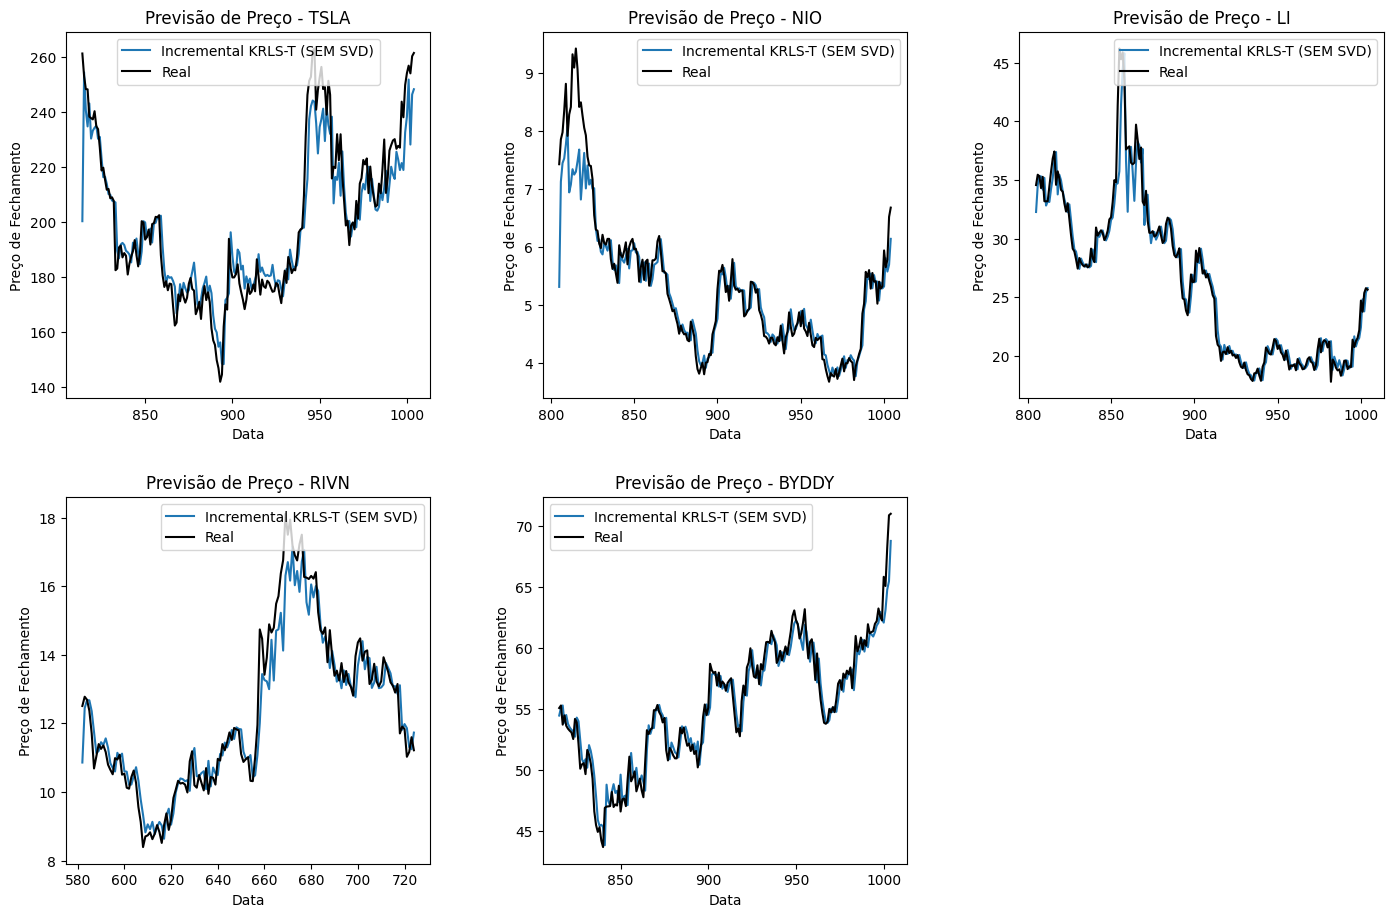

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=5) 

for idx, name in enumerate(tickers):
    row = idx // 3  
    col = idx % 3   
    axs[row, col].plot(y_test[name].index, previsoes_s_SVD[name], label='Incremental KRLS-T (SEM SVD)')
    axs[row, col].plot(y_test[name].index, y_test[name], label='Real', color='black')
    axs[row, col].set_title(f'Previsão de Preço - {name}')
    axs[row, col].set_xlabel('Data')
    axs[row, col].set_ylabel('Preço de Fechamento')
    axs[row, col].legend()

axs[1, 2].axis('off')

plt.show()

### Algoritmo Recursive Least-Squares Tracker COM SVD

Como visto anteriormente, estamos instanciando nossos modelos com os hiperparâmetros que já foram estudados manualemente, em trabalhos futuros sugere-se o estudo do algoritmo de otimização bayeseana para o espaço de hiperparâmetros do algoritmo KRLS-T.

Cabe salientar que são os mesmos hiperparâmetros utilizados no KRLS-T sem SVD.

In [17]:
model_com_svd_por_iteracao = {name: [] for name in tickers}
Ms = {
    'TSLA': 10, 'NIO':10, 'LI': 5, 'RIVN': 10, 'BYDDY': 10
}
for name in tickers:
    for i in range(QTD_ITERACAO):
        model_com_svd_por_iteracao[name].append(KRLS.Krls_t(lambda_= 0.00001, c=0.00000001,M=Ms[name], sigma = 1))

In [18]:
tmp_partial_fit_c_SVD = {name: [[] for _ in range(QTD_ITERACAO)] for name in tickers}

for name in tickers:
    for j in range(QTD_ITERACAO):
        start_time = time.time()
        for i in range(len(X_train[name])):
            model_com_svd_por_iteracao[name][j].learn_one(X_train_scale[name][i], y_train_scale[name][i], int(X_train[name].index[i]))
        end_time = time.time()
        tmp_partial_fit_c_SVD[name][j].append(end_time - start_time)

Nesta etapa, estamos fazendo a previsão da nossa série de teste, o procedimento que acontece é fazer a previsão ponto a ponto, para cada instante de t+1 previsto, damos ao modelo o valor real do instante t+1.

In [19]:
tmp_previsoes_c_SVD = {name: [] for name in tickers}  
previsoes_c_SVD = {name: [[] for _ in range(QTD_ITERACAO)] for name in tickers}  

for name in tickers:
    for j in range(QTD_ITERACAO):
        previsoes = []
        
        for i in range(len(X_test[name])):
            start_time = time.time()
            
            y_pred, desv = model_com_svd_por_iteracao[name][j].predict(X_test_scale[name][i])
            
            model_com_svd_por_iteracao[name][j].learn_one(
                X_test_scale[name][i], y_test_scale[name][i], int(X_test[name].index[i])
            )
            
            previsoes.append(y_pred)
            end_time = time.time()
            tmp_previsoes_c_SVD[name].append(end_time - start_time)
        
        previsoes_c_SVD[name][j] = np.array(previsoes)

Nesta etapa estamos apenas aplicando a transformação inversa para obter as nossas previsões na unidade de media correta, que é o valor em dólar.

In [20]:
for name in tickers:
    previsoes_c_SVD[name] = [arr[0, 0] for arr in previsoes_c_SVD[name][0]]
    previsoes_c_SVD[name] = y_scale[name].inverse_transform(np.array([previsoes_c_SVD[name]]))
    previsoes_c_SVD[name] = previsoes_c_SVD[name][0].reshape(-1,1)

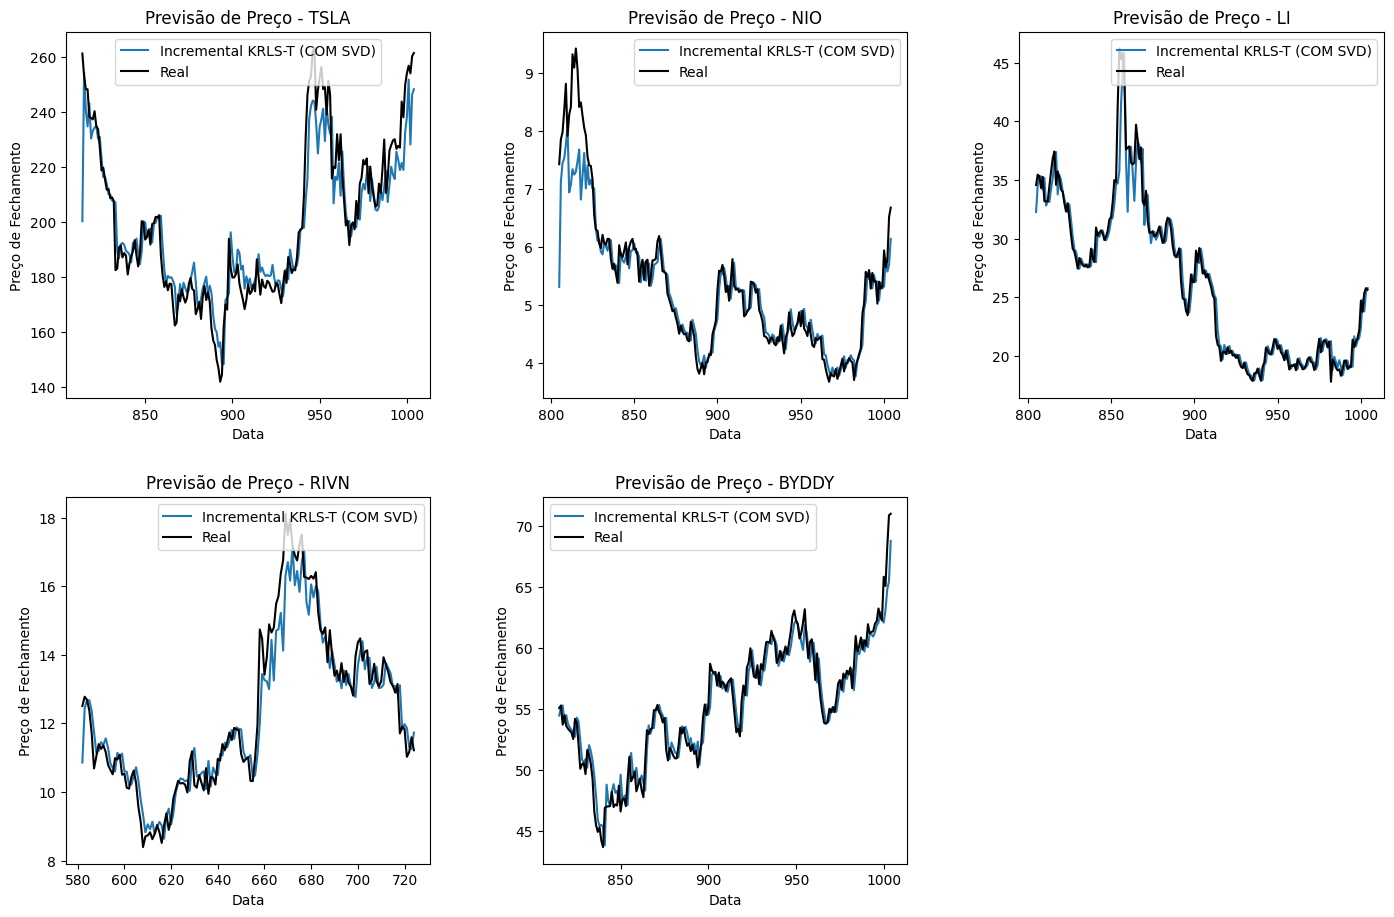

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=5) 

for idx, name in enumerate(tickers):
    row = idx // 3  
    col = idx % 3   
    
    axs[row, col].plot(y_test[name].index, previsoes_c_SVD[name], label='Incremental KRLS-T (COM SVD)')
    axs[row, col].plot(y_test[name].index, y_test[name], label='Real', color='black')
    axs[row, col].set_title(f'Previsão de Preço - {name}')
    axs[row, col].set_xlabel('Data')
    axs[row, col].set_ylabel('Preço de Fechamento')
    axs[row, col].legend()

axs[1, 2].axis('off')

plt.show()

### Gráficos

Aqui, representamos graficamente os resultados das previsões obtidas nas subseções anteriores, onde a análise visual em muitos dos casos ajundam na interpretação dos resultados complementando os resultados via tabela de métricas para a análise do desempenho das previsões em geral.

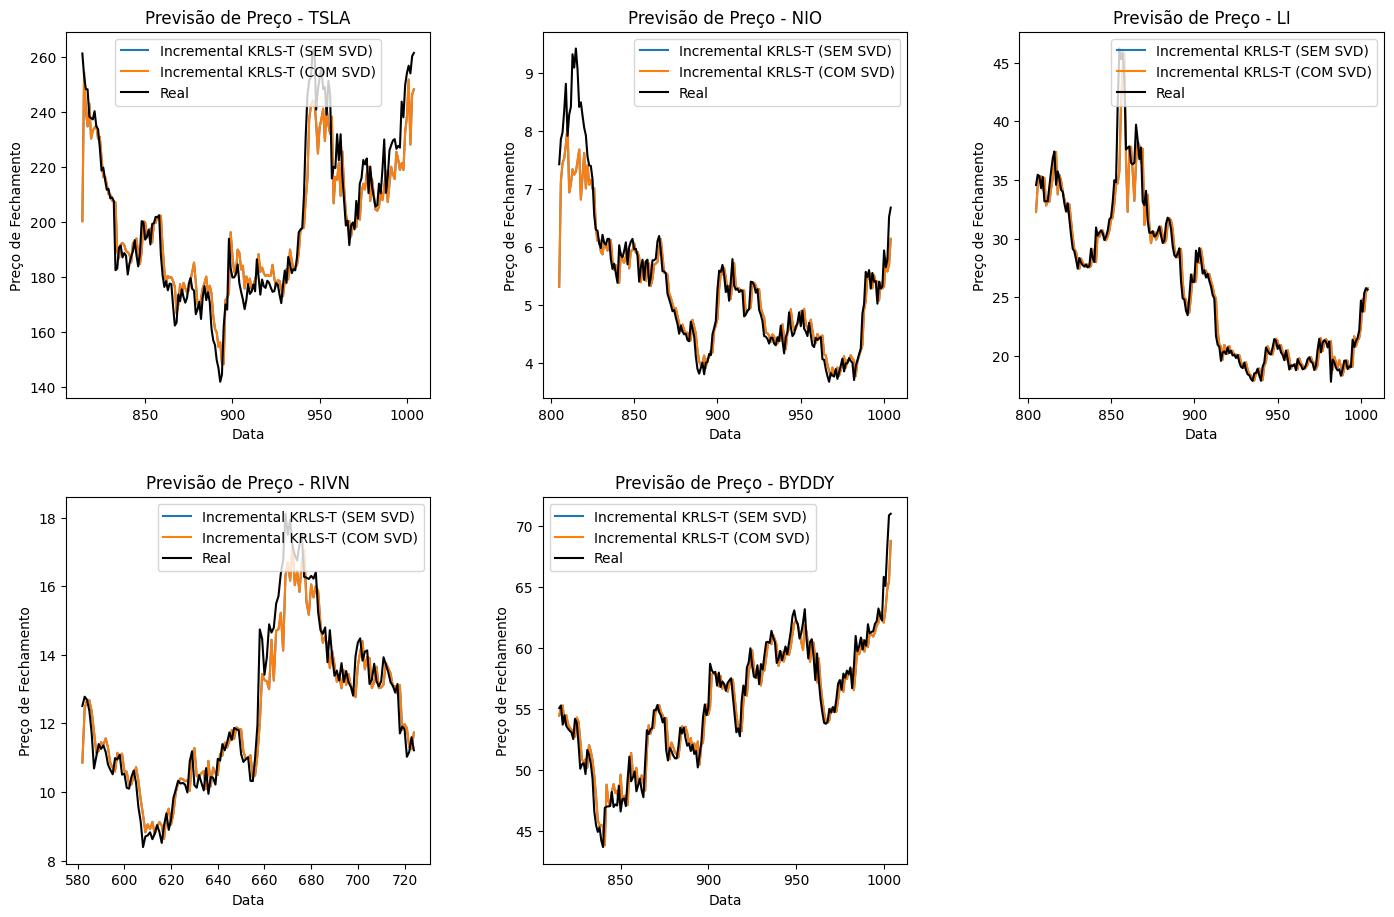

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=5) 

for idx, name in enumerate(tickers):
    row = idx // 3  
    col = idx % 3   
    
    
    axs[row, col].plot(y_test[name].index, previsoes_s_SVD[name], label='Incremental KRLS-T (SEM SVD)')
    axs[row, col].plot(y_test[name].index, previsoes_c_SVD[name], label='Incremental KRLS-T (COM SVD)')
    axs[row, col].plot(y_test[name].index, y_test[name], label='Real', color='black')
    axs[row, col].set_title(f'Previsão de Preço - {name}')
    axs[row, col].set_xlabel('Data')
    axs[row, col].set_ylabel('Preço de Fechamento')
    axs[row, col].legend()

axs[1, 2].axis('off')

plt.show()

## Desempenhos

### Funções Utilitárias

In [23]:
def get_table_metrics(tickers: dict, model_name, rw: bool, metricas: dict):
    metricas_table = {
        'TS': [ticker for ticker in tickers],
        'Model': model_name,
        'SVD': rw,
        'MSE': [metricas[ticker][metricas[ticker]['Métrica'] == 'MSE']['Valor'].values[0] for ticker in tickers],
        'MAE': [metricas[ticker][metricas[ticker]['Métrica'] == 'MAE']['Valor'].values[0] for ticker in tickers],
        'MAPE': [metricas[ticker][metricas[ticker]['Métrica'] == 'MAPE']['Valor'].values[0] for ticker in tickers],
        'RMSE': [metricas[ticker][metricas[ticker]['Métrica'] == 'RMSE']['Valor'].values[0] for ticker in tickers],
        'R^2': [metricas[ticker][metricas[ticker]['Métrica'] == 'R^2']['Valor'].values[0] for ticker in tickers],
        'U de THEIL': [metricas[ticker][metricas[ticker]['Métrica'] == 'THEIL']['Valor'].values[0] for ticker in tickers],
        'ARV': [metricas[ticker][metricas[ticker]['Métrica'] == 'ARV']['Valor'].values[0] for ticker in tickers],
        'WPOCID': [metricas[ticker][metricas[ticker]['Métrica'] == 'WPOCID']['Valor'].values[0] for ticker in tickers],
    }
    return pd.DataFrame(metricas_table)

### Desempenhos

Geramos aqui a nossa tabela com as métricas das previsões da modelagem do algoritmo KRLS-T sem a utilização da decomposição SVD.

In [24]:
metricas_s_SVD = {}
for name in tickers:
    metricas_s_SVD[name] = ax.calcular_metricas_regressao(y_test[name], previsoes_s_SVD[name])

metricas_s_SVD = get_table_metrics(tickers,'KRLS-T', False, metricas_s_SVD)
metricas_s_SVD

,TS,Model,SVD,MSE,MAE,MAPE,RMSE,R^2,U de THEIL,ARV,WPOCID
0,TSLA,KRLS-T,False,106.315418,7.362603,0.035607,10.310937,0.872952,1.624598,0.127048,0.521053
1,NIO,KRLS-T,False,0.200566,0.261921,0.043647,0.447846,0.869933,2.842222,0.130067,0.487437
2,LI,KRLS-T,False,2.116497,0.887788,0.031817,1.454819,0.953710,1.340510,0.046290,0.477387
3,RIVN,KRLS-T,False,0.457619,0.480914,0.037832,0.676475,0.918728,1.491092,0.081272,0.521127
4,BYDDY,KRLS-T,False,1.677917,0.991507,0.018020,1.295344,0.936200,1.165911,0.063800,0.603175


Geramos aqui a nossa tabela com as métricas das previsões da modelagem do algoritmo KRLS-T com a utilização da decomposição SVD.

In [25]:
metricas_c_SVD = {}
for name in tickers:
    metricas_c_SVD[name] = ax.calcular_metricas_regressao(y_test[name], previsoes_c_SVD[name])

metricas_c_SVD = get_table_metrics(tickers,'KRLS-T', True, metricas_c_SVD)
metricas_c_SVD

,TS,Model,SVD,MSE,MAE,MAPE,RMSE,R^2,U de THEIL,ARV,WPOCID
0,TSLA,KRLS-T,True,106.315418,7.362603,0.035607,10.310937,0.872952,1.624598,0.127048,0.521053
1,NIO,KRLS-T,True,0.200566,0.261921,0.043647,0.447846,0.869933,2.842222,0.130067,0.487437
2,LI,KRLS-T,True,2.116497,0.887788,0.031817,1.454819,0.953710,1.340510,0.046290,0.477387
3,RIVN,KRLS-T,True,0.457619,0.480914,0.037832,0.676475,0.918728,1.491092,0.081272,0.521127
4,BYDDY,KRLS-T,True,1.677917,0.991507,0.018020,1.295344,0.936200,1.165911,0.063800,0.603175


Geramos aqui a nossa tabela com os tempos de execução tanto no patial fit quanto em predict do algoritmo KRLS-T sem a utilização da decomposição SVD.

In [26]:
tempos_table_s_SVD = {
    'TS': [],
    'SVD': False,
    'ITERAÇÃO': [],
    'TEMPO - PARTIAL FIT (s)': [],
    'TEMPO - PREVISÃO (s)': []
}

for name in tickers:
    for j in range(QTD_ITERACAO):
        tempos_table_s_SVD['TS'].append(name)
        tempos_table_s_SVD['ITERAÇÃO'].append(j + 1)

        tempo_partial_fit = tmp_partial_fit_c_SVD[name][j][0] if j < len(tmp_partial_fit_c_SVD[name]) else 'N/A'
        
        # Tempo de previsão é um valor simples
        tempo_previsao = tmp_previsoes_c_SVD[name][j] if j < len(tmp_previsoes_c_SVD[name]) else 'N/A'
        
        # Adiciona os tempos à tabela
        tempos_table_s_SVD['TEMPO - PARTIAL FIT (s)'].append(tempo_partial_fit)
        tempos_table_s_SVD['TEMPO - PREVISÃO (s)'].append(tempo_previsao)

# Converte a tabela de tempos para um DataFrame
tempos_table_s_SVD = pd.DataFrame(tempos_table_s_SVD)
tempos_table_s_SVD

,TS,SVD,ITERAÇÃO,TEMPO - PARTIAL FIT (s),TEMPO - PREVISÃO (s)
0,TSLA,False,1,0.603146,0.016008
1,TSLA,False,2,0.537890,0.001021
2,TSLA,False,3,0.667992,0.001002
3,TSLA,False,4,0.555320,0.001001
4,TSLA,False,5,0.581043,0.000996
...,...,...,...,...,...
145,BYDDY,False,26,0.349547,0.000000
146,BYDDY,False,27,0.366712,0.000000
147,BYDDY,False,28,0.381709,0.000000
148,BYDDY,False,29,0.334203,0.000000


Geramos aqui a nossa tabela com os tempos de execução tanto no patial fit quanto em predict do algoritmo KRLS-T com a utilização da decomposição SVD.

In [27]:
tempos_table_c_SVD = {
    'TS': [],
    'SVD': True,
    'ITERAÇÃO': [],
    'TEMPO - PARTIAL FIT (s)': [],
    'TEMPO - PREVISÃO (s)': []
}

for name in tickers:
    for j in range(QTD_ITERACAO):
        tempos_table_c_SVD['TS'].append(name)
        tempos_table_c_SVD['ITERAÇÃO'].append(j + 1)

        tempo_partial_fit = tmp_partial_fit_c_SVD[name][j][0] if j < len(tmp_partial_fit_c_SVD[name]) else 'N/A'
        
        # Tempo de previsão é um valor simples
        tempo_previsao = tmp_previsoes_c_SVD[name][j] if j < len(tmp_previsoes_c_SVD[name]) else 'N/A'
        
        # Adiciona os tempos à tabela
        tempos_table_c_SVD['TEMPO - PARTIAL FIT (s)'].append(tempo_partial_fit)
        tempos_table_c_SVD['TEMPO - PREVISÃO (s)'].append(tempo_previsao)

# Converte a tabela de tempos para um DataFrame
tempos_table_c_SVD = pd.DataFrame(tempos_table_c_SVD)
tempos_table_c_SVD

,TS,SVD,ITERAÇÃO,TEMPO - PARTIAL FIT (s),TEMPO - PREVISÃO (s)
0,TSLA,True,1,0.603146,0.016008
1,TSLA,True,2,0.537890,0.001021
2,TSLA,True,3,0.667992,0.001002
3,TSLA,True,4,0.555320,0.001001
4,TSLA,True,5,0.581043,0.000996
...,...,...,...,...,...
145,BYDDY,True,26,0.349547,0.000000
146,BYDDY,True,27,0.366712,0.000000
147,BYDDY,True,28,0.381709,0.000000
148,BYDDY,True,29,0.334203,0.000000


Juntamos em uma única tabela os dados de cada simulação de mdoelagem dos tempos, temos uma coluna SVD que podemos identificar se foi utilizado ou não a decomposição SVD, ajudando na interpretação dos resultados.

In [28]:
tempos_table_concatenada = pd.concat([tempos_table_s_SVD, tempos_table_c_SVD], axis=0, ignore_index=True)
tempos_table_concatenada = tempos_table_concatenada.sort_values(by=['TS', 'ITERAÇÃO']).reset_index(drop=True)
tempos_table_concatenada

,TS,SVD,ITERAÇÃO,TEMPO - PARTIAL FIT (s),TEMPO - PREVISÃO (s)
0,BYDDY,False,1,0.416354,0.000000
1,BYDDY,True,1,0.416354,0.000000
2,BYDDY,False,2,0.436946,0.000000
3,BYDDY,True,2,0.436946,0.000000
4,BYDDY,False,3,0.425722,0.000000
...,...,...,...,...,...
295,TSLA,True,28,0.549839,0.000995
296,TSLA,False,29,0.592438,0.000000
297,TSLA,True,29,0.592438,0.000000
298,TSLA,False,30,0.687627,0.001021


Na análise do box-plot podemos observar que não houve resultados tão expressivos com a utilização da decomposição em valores singulares do algoritmo KRLS-T, pois se houve alguma otimização do tempo foi em relação de segundos, o que torna uma otimização irrelevante no nosso cenário de estudo atual. Entra uma questão: Será que o desempenho da otimização da utilização em decomposição em valores singulares se mantém o mesmo para um conjunto de dados muito grande? Cabe avaliar em estudos futuros.

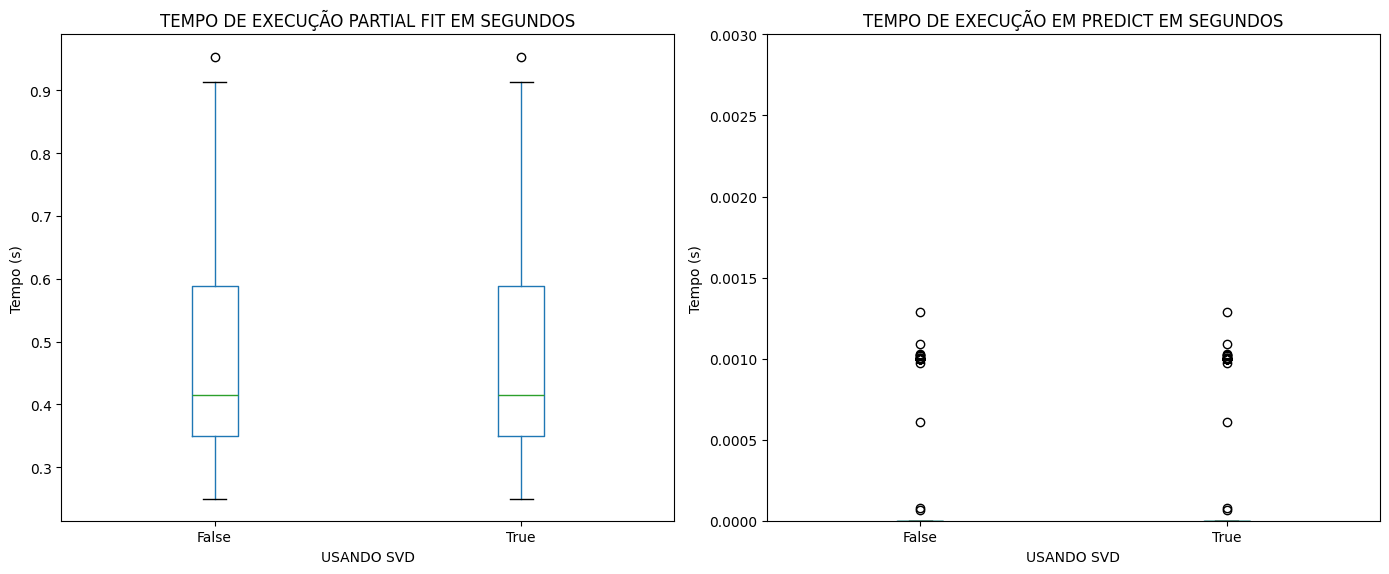

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Primeiro boxplot (TEMPO - PARTIAL FIT)
tempos_table_concatenada.boxplot(column='TEMPO - PARTIAL FIT (s)', by='SVD', grid=False, ax=axes[0])
axes[0].set_title("TEMPO DE EXECUÇÃO PARTIAL FIT EM SEGUNDOS")
axes[0].set_ylabel("Tempo (s)")
axes[0].set_xlabel("USANDO SVD")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Segundo boxplot (TEMPO - PREVISÃO)
tempos_table_concatenada.boxplot(column='TEMPO - PREVISÃO (s)', by='SVD', grid=False, ax=axes[1])
axes[1].set_title("TEMPO DE EXECUÇÃO EM PREDICT EM SEGUNDOS")
axes[1].set_ylabel("Tempo (s)")
axes[1].set_xlabel("USANDO SVD")
axes[1].set_ylim(0, 0.003)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# Ajustando o título geral
plt.suptitle("")
plt.tight_layout()  # Ajusta o layout para não sobrepor os gráficos
plt.show()

Abaixo juntamos as métricas tanto da modelagem com a decomposição em valores singulares como a não utlização, podemos identificar essas duas categorias em razão da coluna SVD. Podemos observar que as métricas se matém em ambos os casos, o que não houve nem perca e nem ganho de resultados expressivos na utilização da decomposição SVD.

In [30]:
metricas_table_concatenada = pd.concat([metricas_s_SVD, metricas_c_SVD], axis=0, ignore_index=True)
metricas_table_concatenada = metricas_table_concatenada.sort_values(by=['TS']).reset_index(drop=True)
metricas_table_concatenada

,TS,Model,SVD,MSE,MAE,MAPE,RMSE,R^2,U de THEIL,ARV,WPOCID
0,BYDDY,KRLS-T,False,1.677917,0.991507,0.018020,1.295344,0.936200,1.165911,0.063800,0.603175
1,BYDDY,KRLS-T,True,1.677917,0.991507,0.018020,1.295344,0.936200,1.165911,0.063800,0.603175
2,LI,KRLS-T,False,2.116497,0.887788,0.031817,1.454819,0.953710,1.340510,0.046290,0.477387
3,LI,KRLS-T,True,2.116497,0.887788,0.031817,1.454819,0.953710,1.340510,0.046290,0.477387
4,NIO,KRLS-T,False,0.200566,0.261921,0.043647,0.447846,0.869933,2.842222,0.130067,0.487437
5,NIO,KRLS-T,True,0.200566,0.261921,0.043647,0.447846,0.869933,2.842222,0.130067,0.487437
6,RIVN,KRLS-T,False,0.457619,0.480914,0.037832,0.676475,0.918728,1.491092,0.081272,0.521127
7,RIVN,KRLS-T,True,0.457619,0.480914,0.037832,0.676475,0.918728,1.491092,0.081272,0.521127
8,TSLA,KRLS-T,False,106.315418,7.362603,0.035607,10.310937,0.872952,1.624598,0.127048,0.521053
9,TSLA,KRLS-T,True,106.315418,7.362603,0.035607,10.310937,0.872952,1.624598,0.127048,0.521053


### Testes de Hipóteses

In [31]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

Nesta seção aplicaremos teste de hipótese para verificar se o uso da decomposição SVD impacta no desempenho computacional ou não. APlicaremos o seguinte teste de hipótese:

$$
H_0: \mu_{\text{com SVD}} = \mu_{\text{sem SVD}}\\

H_1: \mu_{\text{com SVD}} \neq \mu_{\text{sem SVD}}
$$

Aceitar a hipótese nula nos diz que não há impacto significativo na utlização da decomposição SVD, aceitar a hipótese alternativa significa que há diferenças no desempenho computacional entre esses modelos.

In [32]:
partial_fit_svd = tempos_table_concatenada[tempos_table_concatenada['SVD'] == True]['TEMPO - PARTIAL FIT (s)']
partial_fit_no_svd = tempos_table_concatenada[tempos_table_concatenada['SVD'] == False]['TEMPO - PARTIAL FIT (s)']

# Teste de normalidade
shapiro_svd = shapiro(partial_fit_svd)
shapiro_no_svd = shapiro(partial_fit_no_svd)

if shapiro_svd.pvalue > 0.05 and shapiro_no_svd.pvalue > 0.05:
    # Se os dados forem normais, usar teste t de Student
    print('t de Student')
    stat, p_value = ttest_ind(partial_fit_svd, partial_fit_no_svd)
else:
    # Se não forem normais, usar teste de Mann-Whitney
    print('Mann-Whitney:')
    stat, p_value = mannwhitneyu(partial_fit_svd, partial_fit_no_svd)

print(f"Teste para TEMPO - PARTIAL FIT: estatística={stat}, p-valor={p_value}")

Mann-Whitney:
Teste para TEMPO - PARTIAL FIT: estatística=11250.0, p-valor=1.0


In [33]:
# Repetir para TEMPO - PREVISÃO
prediction_svd = tempos_table_concatenada[tempos_table_concatenada['SVD'] == True]['TEMPO - PREVISÃO (s)']
prediction_no_svd = tempos_table_concatenada[tempos_table_concatenada['SVD'] == False]['TEMPO - PREVISÃO (s)']

# Normalidade para TEMPO - PREVISÃO
shapiro_svd_pred = shapiro(prediction_svd)
shapiro_no_svd_pred = shapiro(prediction_no_svd)

if shapiro_svd_pred.pvalue > 0.05 and shapiro_no_svd_pred.pvalue > 0.05:
    # Se os dados forem normais, usar teste t de Student
    print('t de Student')
    stat, p_value = ttest_ind(prediction_svd, prediction_no_svd)
else:
    # Se não forem normais, usar teste de Mann-Whitney
    print('Mann-Whitney:')
    stat, p_value = mannwhitneyu(prediction_svd, prediction_no_svd)

print(f"Teste para TEMPO - PREVISÃO: estatística={stat}, p-valor={p_value}")

Mann-Whitney:
Teste para TEMPO - PREVISÃO: estatística=11250.0, p-valor=1.0


O p-valor de 1.0 indica que não há diferença significativa entre os tempos de execução para os tempos do partial_fit e previsões com e sem SVD.

Um p-valor tão alto significa que não podemos rejeitar a hipótese nula $H_0$ não há diferença significativa entre os dois grupos.

## Conclusões

As métricas avaliadas, como $MSE$, $MAE$, $MAPE$, $RMSE$ e $R^2$, permaneceram estáveis entre os dois formalismos analisados. Em termos numéricos, as diferenças observadas foram de magnitude muito pequena, alcançando apenas a décima segunda casa decimal, o que não é relevante para a prática. Da mesma forma, a análise dos tempos de execução indicou que a introdução da SVD não trouxe melhorias significativas. Testes estatísticos, como o teste de Mann-Whitney, corroboraram esses achados, indicando a ausência de impacto relevante no tempo de execução.

Embora a aplicação da SVD seja reconhecida por suas vantagens em problemas de alta dimensionalidade ou em cenários com necessidade de regularização avançada, os resultados sugerem que sua aplicação no KRLS-T, para as séries temporais avaliadas, pode ser dispensável devido à baixa complexidade dos dados e das matrizes envolvidas.

Apesar dos resultados obtidos, este estudo abre caminhos para investigações futuras. Sugere-se:


- A modificação do algoritmo KRLS-T com a fatoração QR e o método do gradiente conjulgado;
- Investigar a produzir método de manipulação Online/Incremental da decomposição em Valores Singulares (SVD);
- Produzir e modificar algoritmos de otimização de hiperparâmetros para o algoritmo KRLS-T;
- Aplicar o mesmo estudo em séries temporais com uma quantidade de dados maiores.

Concluímos que, para o contexto avaliado, a aplicação da SVD no algoritmo KRLS-T mostrou-se estável, mas sem ganhos significativos em termos de eficiência ou precisão. No entanto, reconhecemos o potencial da SVD em cenários mais desafiadores e encorajamos novos estudos para aprofundar essa análise e ampliar sua aplicabilidade em outras áreas.

## Referências

Eckart, C. and Young, G. (1936). The approximation of one matrix by another of lower rank. **Psychometrika**, 1(3):211–218.

Golub, G. H. and Van Loan, C. F. (1996). **Matrix Computations**. Johns Hopkins University Press, Baltimore, MD, USA, 3rd edition.

Halko, N., Martinsson, P.-G., and Tropp, J. A. (2011). **Finding structure with randomness: Probabilistic algorithms for constructing approximate matrix decompositions**. SIAM Review, 53(2):217–288.

Shalev-Shwartz, S. and Ben-David, S. (2014). **Understanding Machine Learning: From Theory to Algorithms**. Cambridge University Press.

Strang, G. (2009). **Introduction to Linear Algebra**. Wellesley-Cambridge Press.

Strang, G. (2019). **Linear Algebra and Learning from Data**. Wellesley-Cambridge Press, Wellesley, MA, USA.

Suykens, J. (2014). **Regularization, Optimization, Kernels, and Support Vector Machines**. Springer, Berlin.

Trefethen, L. N. and Bau, D. (1997). **Numerical Linear Algebra**. SIAM.

Van Vaerenbergh, S., Lázaro-Gredilla, M., and Santamaría, I. (2015). **Kernel recursive least-squares tracker for time-varying regression**. IEEE Transactions on Signal Processing, 63(7):1730–1741.
